100%|██████████| 792M/792M [00:24<00:00, 31.8MB/s]
100%|██████████| 19.2M/19.2M [00:01<00:00, 14.3MB/s]


Accuracy: 0.92


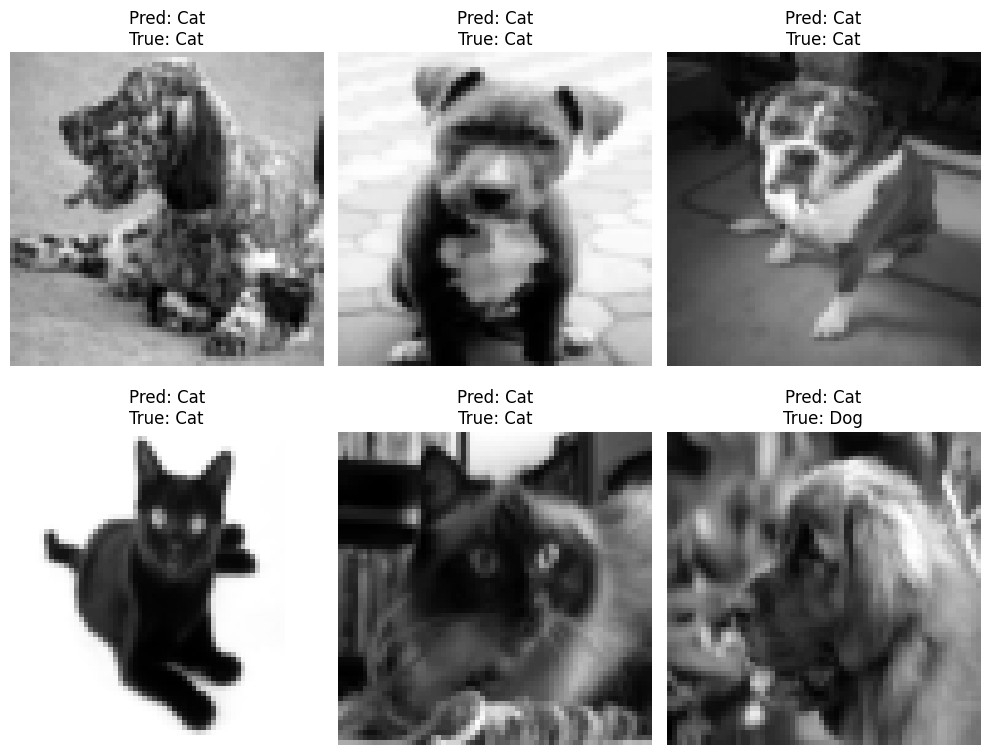

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Automatic dataset download and preparation
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images
    transforms.Grayscale(),        # Convert to grayscale
    transforms.ToTensor(),        # Convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image
])

# This will automatically download and extract the dataset
dataset = torchvision.datasets.OxfordIIITPet(
    root='./data',
    download=True,
    transform=transform
)

# 2. Prepare data for SVM
# Using first 1000 samples for speed (2000 total - 1000 cats, 1000 dogs)
X = []
y = []
for i in range(1000):
    img, label = dataset[i]
    X.append(img.numpy())
    y.append(0 if label < 19 else 1)  # 0-18 are cats, 19-37 are dogs

X = np.array(X)
y = np.array(y)

# 3. Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# 5. Evaluate
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# 6. Visualize some predictions
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    idx = np.random.randint(len(X_test))
    img = X_test[idx].reshape(64, 64)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {'Dog' if y_pred[idx] else 'Cat'}\nTrue: {'Dog' if y_test[idx] else 'Cat'}")
    plt.axis('off')
plt.tight_layout()
plt.show()